<a href="https://colab.research.google.com/github/mukesh527/CIFAR_CNN/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import sys
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dropout, MaxPool2D,Dense,BatchNormalization
from keras.optimizers import SGD,Adam

In [3]:
import keras
print (keras.__version__)

2.5.0


In [4]:
#Load dataset
def load_dataset():
  (train_X,train_y),(test_X,test_y)=cifar10.load_data()
  #onehot encoding
  train_y=to_categorical(train_y)
  test_y=to_categorical(test_y)
  return train_X,train_y,test_X,test_y
  

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


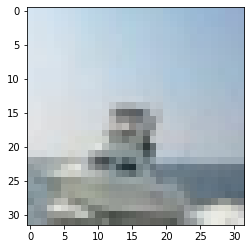

In [30]:
trainX,trainy,testX,testy=load_dataset()
plt.imshow(trainX[100])
print(trainy[100])

In [6]:
#scale prepixel
def prepixel(train,test):
  train_norm=train.astype('float32')
  test_norm=test.astype('float32')
  train_norm=train_norm/255.0
  test_norm=test_norm/255.0
  return train_norm,test_norm


#Architecture 1 :single Convolution layer

In [7]:
#Model
def define_model():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(32,32,3)))
  model.add(MaxPool2D(2,2))
  # model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  # model.add(MaxPool2D(2,2))
  # model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))

  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt=SGD(learning_rate=0.001,momentum=0.0)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model


#Architecture 2 : Double convolution layer


In [8]:
def define_model1():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(32,32,3)))
  model.add(MaxPool2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  # model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))

  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt=SGD(learning_rate=0.001,momentum=0.0)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model


#Architecture 3 : Triple convolution layer

In [9]:
def define_model2():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(32,32,3)))
  model.add(MaxPool2D(2,2))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  opt=SGD(learning_rate=0.001,momentum=0.0)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model


#Architecture 4: Convolution layer With Dropouts

In [10]:
def define_model3():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(32,32,3)))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation='softmax'))

  opt=SGD(learning_rate=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#Architecture 5: Convolution layer With Dropouts & Batch Normalization

In [23]:
def define_model4():
  model=Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(32,32,3)))
  model.add(MaxPool2D(2,2))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(10,activation='softmax'))

  opt=SGD(learning_rate=0.001,momentum=0.9)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
  model.save('/content/gdrive/MyDrive/CNN/LULC-Classification/final_model.h5')
  return model

In [15]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plt.savefig(filename + '_plot.png')
	plt.close()

In [13]:
def run_test_harness(func):
  #load dataset
  trainX,trainY,testX,testY=load_dataset()
  trainX,testX=prepixel(trainX,testX)
  model=func
  history=model.fit(trainX,trainY,epochs=100,batch_size=64,validation_data=(testX,testY),verbose=0)
  _,acc=model.evaluate(testX,testY,verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history)
  return acc*100

#Final model & Accuracy scores

In [24]:
import pandas as pd
res=pd.DataFrame({'models':['model1','model2','model3','model4','model5'],'accuracy':[run_test_harness(define_model()),run_test_harness(define_model1()),run_test_harness(define_model2()),run_test_harness(define_model3()),run_test_harness(define_model4())]})
res

> 61.680
> 64.820
> 66.240
> 78.590
> 79.730


,models,accuracy
0,model1,61.680001
1,model2,64.819998
2,model3,66.240001
3,model4,78.590000
4,model5,79.729998


In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Sample image prediction using the Final trained model

In [26]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
  img=load_img(filename,target_size=(32,32))
  img=img_to_array(img)
  img = img.reshape(1, 32, 32, 3)
  img=img.astype('float32')
  img=img/255.0
  return img
img=load_image('/content/gdrive/MyDrive/CNN/LULC-Classification/sample_image.png')
model=load_model('/content/gdrive/MyDrive/CNN/LULC-Classification/final_model.h5')
result=model.predict_classes(img)
result

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])